In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.optimize import curve_fit
import mpltex
from matplotlib.patches import PathPatch

%matplotlib notebook

In [2]:
def tf_by_td_inertial(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdamped(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(np.sqrt(U0*tm_by_td) + ((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))

def tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td,U0):
    td2_by_td = 1.-td1_by_td

    
    Inertial_Denominator = 1./( tf_by_td_inertial(tm_by_td,tg1_by_td,U0 )*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial(tm_by_td,tg2_by_td,U0)*(1./td2_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped(tm_by_td,tg1_by_td,U0 ) + \
                    td2_by_td*tf_by_td_overdamped(tm_by_td,tg2_by_td,U0 )
    
    value = Overdamped + 1./Inertial_Denominator
    return value

def tf_by_td(tm_by_td,tg_by_td,U0=3.):
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2+
                            ((np.pi/(2+np.sqrt(2)))/(1+10*U0*tg_by_td)))


In [3]:
def tf_by_td_inertial2(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdamped1(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))



def tf_by_td_inertial1(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdamped2(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + ((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))



def tf_by_td_newIn(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td,U0):
    td2_by_td = 1.-td1_by_td

    
    Inertial_Denominator = 1./( tf_by_td_inertial2(tm_by_td,tg1_by_td,U0 )*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial2(tm_by_td,tg2_by_td,U0)*(1./td2_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped1(tm_by_td,tg1_by_td,U0 ) + \
                    td2_by_td*tf_by_td_overdamped1(tm_by_td,tg2_by_td,U0 )
    
    value = Overdamped + 1./Inertial_Denominator
    return value


def tf_by_td_newOv(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td,U0):
    td2_by_td = 1.-td1_by_td

    
    Inertial_Denominator = 1./( tf_by_td_inertial1(tm_by_td,tg1_by_td,U0 )*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial1(tm_by_td,tg2_by_td,U0)*(1./td2_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped2(tm_by_td,tg1_by_td,U0 ) + \
                    td2_by_td*tf_by_td_overdamped2(tm_by_td,tg2_by_td,U0 )
    
    value = Overdamped + 1./Inertial_Denominator
    return value

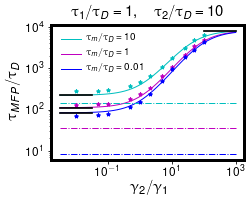

In [11]:
xm = np.genfromtxt('G1G2Tg11Tg210.txt').T

tm001 = np.full((100, 1), tf_by_td(0.01,0.,3.))
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
tm10 = np.full((100, 1), tf_by_td(10.,0.,3.))

xtm = np.logspace(-2.5, 3, 100)


x_Theorym = np.logspace(-2.5,3)
y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 1.
tg2_by_tdm = 10.
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
x1m = np.linspace(80, 250, 10)
x3m = np.logspace(2, 3, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot(x_Theorym):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theorym,y_Theory10,'c', label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1,'m', label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01,'b', label= '$\\tau_m/\\tau_D = 0.01$',)
    
    ax.plot(xtm, tm10, 'c-.')
    ax.plot(xtm, tm1, 'm-.')
    ax.plot(xtm, tm001, 'b-.')

    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*')#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*')#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*')#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')

    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    #ax.plot(x3m,y22m,'k', linewidth=2)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    #ax.plot(x3m,y23m,'k', linewidth=2)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 1, \quad \\tau_2/\\tau_D = 10 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize =10)
    ax.tick_params(axis='both', labelsize=12)
    
    #plt.savefig('newfigure/Articol/Tau11Tau210.pdf', bbox_inches='tight')
    plt.show(block=False)
    #plt.close(fig)
    
my_plot(x_Theorym)   

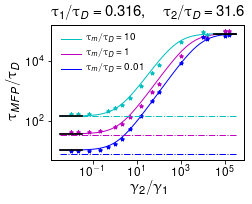

In [5]:
xm = np.genfromtxt('G1G2TG103TG230TM(001-1-10).txt').T

tm0012 = np.full((100, 1), 9.367304965928305)
tm12 = np.full((100, 1), 36.80014095867799)
tm102 = np.full((100, 1), 163.49741244962993)

tm001 = np.full((100, 1), tf_by_td(0.01,0.,3.))
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
tm10 = np.full((100, 1), tf_by_td(10.,0.,3.))


xtm = np.logspace(-2.5, 5.5, 100)

x_Theorym = np.logspace(-2.5,5.5)
y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 0.316
tg2_by_tdm = 31.6
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
#x1m = np.logspace(-2.5, 5, 10)
x3m = np.logspace(4.5, 5.5, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot2(x_Theorym):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theorym,y_Theory10,'c', label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1,'m', label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01,'b', label= '$\\tau_m/\\tau_D = 0.01$',)

    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*')#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*')#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*')#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')
    
    ax.plot(xtm, tm10, 'c-.')
    ax.plot(xtm, tm1, 'm-.')
    ax.plot(xtm, tm001, 'b-.')
    

    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    
    ax.plot(x3m,y22m,'k', linewidth=0.7)
    ax.plot(x3m,y23m,'k', linewidth=0.7)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 0.316, \quad \\tau_2/\\tau_D = 31.6 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    #plt.savefig('newfigure/Articol/Tau103Tau230.pdf', bbox_inches='tight')
    plt.show(block=False)
    #plt.close(fig)
    
my_plot2(x_Theorym)   

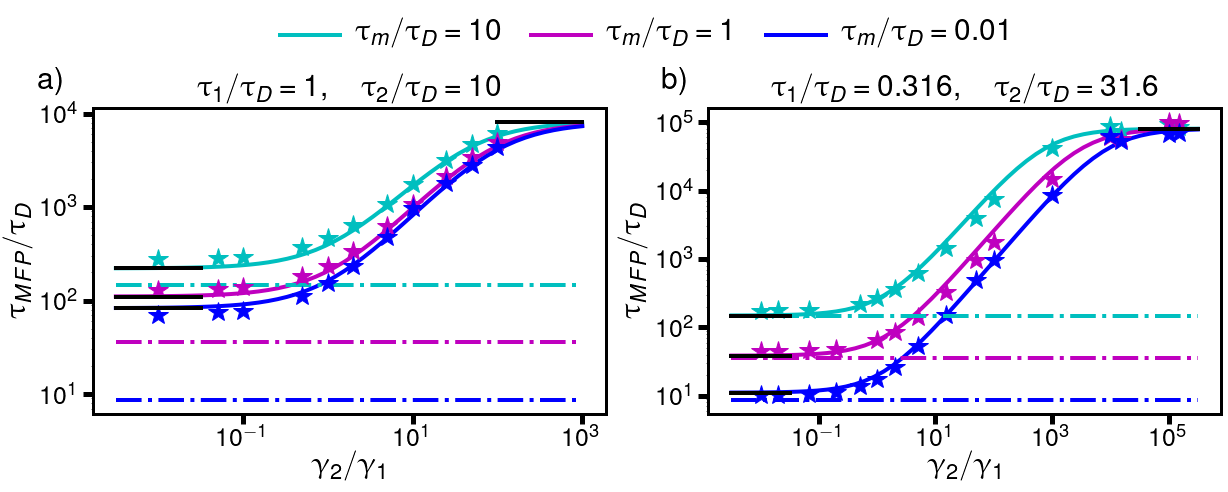

In [18]:
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
x2m = np.logspace(-2.5, -1.5, 10)
tm001 = np.full((100, 1), tf_by_td(0.01,0.,3.))
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
tm10 = np.full((100, 1), tf_by_td(10.,0.,3.))

Pxm = np.genfromtxt('G1G2Tg11Tg210.txt').T

Pxtm = np.logspace(-2.5, 3, 100)

Px_Theorym = np.logspace(-2.5,3)
Py_Theory01 = np.zeros_like(Px_Theorym)
Py_Theory1 = np.zeros_like(Px_Theorym)
Py_Theory10 = np.zeros_like(Px_Theorym)
#
Ptg1_by_tdm = 1.
Ptg2_by_tdm = 10.

  
Px1m = np.linspace(80, 250, 10)
Px3m = np.logspace(2, 3, 10)
Px2m = np.logspace(-2.5, -1.5, 10)
Py11m=np.full(x1m.shape,tf_by_td(tm_by_td1,Ptg1_by_tdm,3))   
Py21m=np.full(x1m.shape,tf_by_td(tm_by_td1,Ptg2_by_tdm,3))   
Py12m=np.full(x1m.shape,tf_by_td(tm_by_td01,Ptg1_by_tdm,3))   
Py22m=np.full(x1m.shape,tf_by_td(tm_by_td01,Ptg2_by_tdm,3))   
Py13m=np.full(x1m.shape,tf_by_td(tm_by_td10,Ptg1_by_tdm,3))   
Py23m=np.full(x1m.shape,tf_by_td(tm_by_td10,Ptg2_by_tdm,3)) 

for i,e in enumerate(Px_Theorym):
    td1_by_tdm = 1./(1.+e)
    Py_Theory01[i] = tf_by_td_new(tm_by_td01,Ptg1_by_tdm,Ptg2_by_tdm,td1_by_tdm,3)
    Py_Theory1[i] = tf_by_td_new(tm_by_td1,Ptg1_by_tdm,Ptg2_by_tdm,td1_by_tdm,3)
    Py_Theory10[i] = tf_by_td_new(tm_by_td10,Ptg1_by_tdm,Ptg2_by_tdm,td1_by_tdm,3)
#########################    
Sxm = np.genfromtxt('G1G2TG103TG230TM(001-1-10).txt').T
Sxtm = np.logspace(-2.5, 5.5, 100)

Sx_Theorym = np.logspace(-2.5,5.5)
Sy_Theory01 = np.zeros_like(Sx_Theorym)
Sy_Theory1 = np.zeros_like(Sx_Theorym)
Sy_Theory10 = np.zeros_like(Sx_Theorym)
#
Stg1_by_tdm = 0.316
Stg2_by_tdm = 31.6

Sx3m = np.logspace(4.5, 5.5, 10)
Sy11m=np.full(x1m.shape,tf_by_td(tm_by_td1,Stg1_by_tdm,3))   
Sy21m=np.full(x1m.shape,tf_by_td(tm_by_td1,Stg2_by_tdm,3))   
Sy12m=np.full(x1m.shape,tf_by_td(tm_by_td01,Stg1_by_tdm,3))   
Sy22m=np.full(x1m.shape,tf_by_td(tm_by_td01,Stg2_by_tdm,3))   
Sy13m=np.full(x1m.shape,tf_by_td(tm_by_td10,Stg1_by_tdm,3))   
Sy23m=np.full(x1m.shape,tf_by_td(tm_by_td10,Stg2_by_tdm,3))   

for i,e in enumerate(Sx_Theorym):
    td1_by_tdm = 1./(1.+e)
    Sy_Theory01[i] = tf_by_td_new(tm_by_td01,Stg1_by_tdm,Stg2_by_tdm,td1_by_tdm,3)
    Sy_Theory1[i] = tf_by_td_new(tm_by_td1,Stg1_by_tdm,Stg2_by_tdm,td1_by_tdm,3)
    Sy_Theory10[i] = tf_by_td_new(tm_by_td10,Stg1_by_tdm,Stg2_by_tdm,td1_by_tdm,3)


############################################################
fsize = np.array([3.25,2.20935])
@mpltex.acs_decorator
def my_plot(x_Theorym):
    #fig, ax = plt.subplots(1,2,figsize=[2.9*fsize[0], 1.3*fsize[1]])
    fig, ax = plt.subplots(1,2,figsize=(19,5))
    ax[0].plot(Px_Theorym,Py_Theory10,'c',lw=4, label= '$\\tau_m/\\tau_D = 10$')
    ax[0].plot(Px_Theorym,Py_Theory1,'m',lw=4, label= '$\\tau_m/\\tau_D = 1$ ')
    ax[0].plot(Px_Theorym,Py_Theory01,'b',lw=4, label= '$\\tau_m/\\tau_D = 0.01$')
    
    ax[0].plot(Pxtm,tm10, 'c-.',lw=4)
    ax[0].plot(Pxtm, tm1, 'm-.',lw=4)
    ax[0].plot(Pxtm, tm001, 'b-.',lw=4)

    ax[0].plot(Pxm[0],Pxm[3],'c*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax[0].plot(Pxm[0],Pxm[2],'m*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax[0].plot(Pxm[0],Pxm[1],'b*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')

    ax[0].plot(x2m,Py11m,'k',lw=4)
    ax[0].plot(Px3m,Py21m,'k',lw=4)
    ax[0].plot(x2m,Py12m,'k',lw=4)
    ax[0].plot(x2m,Py13m,'k',lw=4)

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_title('$\\tau_1/\\tau_D = 1, \quad \\tau_2/\\tau_D = 10 $', size=30)
    ax[0].set_xlabel('$\\gamma_2/\\gamma_1$', size=30)
    ax[0].set_ylabel('$ \\tau_{MFP}/ \\tau_D$', size=30)
    #ax[0].legend( bbox_to_anchor=(0.98, 0.8), fontsize =15)
    ax[0].legend( bbox_to_anchor=(1.85, 1.38), ncol=3, fontsize =30)
    ax[0].tick_params(axis='both', labelsize=15)
                                                
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_linewidth(3)
   
    ax[0].tick_params(axis='both',labelsize=25,length = 10,width = 5)                                          
    
    
    ax[1].plot(Sx_Theorym,Sy_Theory10,'c',lw=4, label= '$\\tau_m/\\tau_D = 10$')
    ax[1].plot(Sx_Theorym,Sy_Theory1,'m',lw=4, label= '$\\tau_m/\\tau_D = 1$ ')
    ax[1].plot(Sx_Theorym,Sy_Theory01,'b',lw=4, label= '$\\tau_m/\\tau_D = 0.01$')

    ax[1].plot(Sxm[0],Sxm[3],'c*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax[1].plot(Sxm[0],Sxm[2],'m*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax[1].plot(Sxm[0],Sxm[1],'b*', markersize = 20)#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')
    
    ax[1].plot(Sxtm, tm10, 'c-.',lw=4)
    ax[1].plot(Sxtm, tm1, 'm-.',lw=4)
    ax[1].plot(Sxtm, tm001, 'b-.',lw=4)
    

    ax[1].plot(x2m,Sy11m,'k',lw=4)
    ax[1].plot(Sx3m,Sy21m,'k',lw=4)
    ax[1].plot(x2m,Sy12m,'k',lw=4)
    ax[1].plot(x2m,Sy13m,'k',lw=4)
    
    ax[1].plot(Sx3m,Sy22m,'k',lw=4)
    ax[1].plot(Sx3m,Sy23m,'k',lw=4)

    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_title('$\\tau_1/\\tau_D = 0.316, \quad \\tau_2/\\tau_D = 31.6 $',size=30)
    ax[1].set_xlabel('$\\gamma_2/\\gamma_1$', size=30)
    ax[1].set_ylabel('$ \\tau_{MFP}/ \\tau_D$', size=30)
    #ax[1].legend(loc='upper left', fontsize=10)
    ax[1].tick_params(axis='both', labelsize=30)
    
    ax[1].text(4e-15,3e5,r'a)',size=30)
    ax[1].text(2e-4,3e5,r'b)',size=30)
                           
    #plt.subplots_adjust(bottom=0.32,wspace=1,top = 0.9)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[1].spines[spine].set_linewidth(3)
   
    ax[1].tick_params(axis='both',labelsize=25,length = 10,width = 5)
                           
    #+plt.savefig('MFPM.pdf', bbox_inches='tight')
    plt.show(block=False)
    plt.close(fig)
my_plot(x_Theorym)   

In [7]:
tg21_by_td = 0.1
tg22_by_td = 0.316
tg23_by_td = 1.
tg24_by_td = 3.16
tg25_by_td = 10.
U0=3

td1_by_td=1./3
td2_by_td=1.-td1_by_td
tm_by_td=1.

tg1_by_td1 = 0.05*(1/td1_by_td)
tg21_by_td2 = 0.1*(1/td2_by_td)
tg22_by_td2 = 0.316*(1/td2_by_td)
tg23_by_td2 = 1.0*(1/td2_by_td)
tg24_by_td2 = 3.16*(1/td2_by_td)
tg25_by_td2 = 10.*(1/td2_by_td)
tm_by_td1 = tm_by_td*((1/td1_by_td)**2)
tm_by_td2 = tm_by_td*((1/td2_by_td)**2)

print(td2_by_td*tf_by_td(tm_by_td2,tg21_by_td2,3))
print(tf_by_td_new(tm_by_td,30,tg21_by_td,td1_by_td,U0))

print(td2_by_td*tf_by_td(tm_by_td2,tg25_by_td2,3))
print(tf_by_td_new(tm_by_td,30,tg25_by_td,td1_by_td,U0))

35.18741756537785
41.47725911387834
12084.566809216809
11453.43254430174


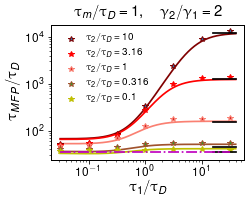

In [8]:
a= np.loadtxt("G12G2tG1(003-01-03-1-3-10-31)tG2(01-03-1-3-10)tM1.txt")
a[:,0]
a1=(a[0,1],a[1,1],a[2,1],a[3,1],a[4,1],a[5,1],a[6,1])
a2=(a[0,2],a[1,2],a[2,2],a[3,2],a[4,2],a[5,2],a[6,2])
a3=(a[0,3],a[1,3],a[2,3],a[3,3],a[4,3],a[5,3],a[6,3])
a4=(a[0,4],a[1,4],a[2,4],a[3,4],a[4,4],a[5,4],a[6,4])
a5=(a[0,5],a[1,5],a[2,5],a[3,5],a[4,5],a[5,5],a[6,5])


x1 = np.logspace(1.2,1.6, 10)
x2 = np.logspace(-1.5, -1., 10)
tg1_by_td = np.logspace(-1.5, 1.6, 1000)

tg21_by_td = 0.1
tg22_by_td = 0.316
tg23_by_td = 1.
tg24_by_td = 3.16
tg25_by_td = 10.
U0=3

td1_by_td=1./3
td2_by_td=1.-td1_by_td
tm_by_td=1.

tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
xtm = np.logspace(-1.5, 1.5, 100)

####Devo considerare tg/td_i=(gamma/gamma_i)tg/td perche` td_i = (gamma_i/gamma)td 
####e lo stesso per tm/td  tm_i/td_i = (gamma^2/gamma_i^2)tm/td
tg1_by_td1 = 0.05*(1/td1_by_td)
tg21_by_td2 = tg21_by_td*(1/td2_by_td)
tg22_by_td2 = tg22_by_td*(1/td2_by_td)
tg23_by_td2 = tg23_by_td*(1/td2_by_td)
tg24_by_td2 = tg24_by_td*(1/td2_by_td)
tg25_by_td2 = tg25_by_td*(1/td2_by_td)
tm_by_td1 = tm_by_td*((1/td1_by_td)**2)
tm_by_td2 = tm_by_td*((1/td2_by_td)**2)
#
y1=np.full(x2.shape,td1_by_td*tf_by_td(tm_by_td1,tg1_by_td1,3))
y21=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg21_by_td2,3))
y22=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg22_by_td2,3))
y23=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg23_by_td2,3))
y24=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg24_by_td2,3))
y25=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg25_by_td2,3))


tmf1=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg21_by_td,td1_by_td,U0))
tmf2=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg22_by_td,td1_by_td,U0))
tmf3=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg23_by_td,td1_by_td,U0))
tmf4=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg24_by_td,td1_by_td,U0))
tmf5=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg25_by_td,td1_by_td,U0))


@mpltex.acs_decorator
def my_plot3(tg1_by_td):
    fig, ax = plt.subplots(1,1)    

    ax.loglog(tg1_by_td,tmf5,'maroon',linewidth=1.7)
    ax.loglog(tg1_by_td,tmf4,'r',linewidth=1.7)
    ax.loglog(tg1_by_td,tmf3,'salmon',linewidth=1.7)
    ax.loglog(tg1_by_td,tmf2,'sienna',linewidth=1.7)
    ax.loglog(tg1_by_td,tmf1,'y',linewidth=1.7)
    
    ax.loglog(a[:,0],a5,markeredgecolor='maroon', marker='*', markersize=6, linestyle="None",label='$\\tau_2/\\tau_D=10$')
    ax.loglog(a[:,0],a4,'*r', markersize=6,label='$\\tau_2/\\tau_D=3.16$')
    ax.loglog(a[:,0],a3,markeredgecolor='salmon', marker='*', markersize=6, linestyle="None",label='$\\tau_2/\\tau_D=1$')
    ax.loglog(a[:,0],a2,markeredgecolor='sienna', marker='*', markersize=6, linestyle="None",label='$\\tau_2/\\tau_D=0.316$')
    ax.loglog(a[:,0],a1,'*y', markersize=6,label='$\\tau_2/\\tau_D=0.1$')

    #ax.plot(x2,y1,'k', linewidth=1.7)
    ax.plot(x1,y21,'k', linewidth=1.7)
    ax.plot(x1,y22,'k', linewidth=1.7)
    ax.plot(x1,y23,'k', linewidth=1.7)
    ax.plot(x1,y24,'k', linewidth=1.7)
    ax.plot(x1,y25,'k', linewidth=1.7)
    
    ax.plot(xtm, tm1, 'm-.',linewidth=1.7)

    ax.set_xlabel("$\\tau_{1}/\\tau_D$",size=15)
    ax.set_ylabel("$\\tau_{MFP}/\\tau_D$",size=15)
    plt.title('$\\tau_m/\\tau_D = 1, \quad \\gamma_2/\\gamma_1 = 2 $',size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    #plt.savefig('Tau1.pdf', bbox_inches='tight')
    plt.show(block=False)
    plt.close(fig)

my_plot3(tg1_by_td)  

In [9]:
print(tf_by_td_new(1.0,10.,0.1,1./3,3.))
print(tf_by_td_new(1.0,15.,0.1,1./3,3.))
print(tf_by_td_new(1.0,30.,0.1,1./3,3.))

print(tf_by_td((1/(2./3))**2,(0.1)*(1./(2/3)),3.)*(2/3))
#print(tf_by_td(1.,0.1,3.))

#print(np.exp(3.)/3.)
#print(2*np.sqrt(3.) + 1.)
#print(4*3.*(0.1)**2+((np.pi/(2+np.sqrt(2)))/(1+10*3*0.1)))


41.452603807417916
41.468680203247416
41.47725911387834
35.18741756537786


In [10]:
Inertial_Denominator = 1./(((np.exp(3)/3)*(np.sqrt(3) + 1+ 4*3*(30)**2))*(1./(1./3))) +1./(((np.exp(3)/3)*(np.sqrt(3) + 1+ 4*3*(0.316)**2))*(1./(2./3)))
Inertial_Denominator1 = 1./(((np.exp(3)/3)*(np.sqrt(3) + 1+ 4*3*(30)**2))*(1./(1./3)))
Inertial_Denominator2 = 1./(((np.exp(3)/3)*(np.sqrt(3) + 1+ 4*3*(0.316)**2))*(1./(2./3)))

Overdamped = (1./3)*(np.exp(3)/3)*(np.sqrt(3) + ((np.pi/(2*np.sqrt(2)))/(1+10*3*30)))+ (2./3)*(np.exp(3)/3)*(np.sqrt(3) + ((np.pi/(2*np.sqrt(2)))/(1+10*3*0.316)))
Overdamped1 = (1./3)*(np.exp(3)/3)*(np.sqrt(3) + ((np.pi/(2*np.sqrt(2)))/(1+10*3*30)))
Overdamped2 = (2./3)*(np.exp(3)/3)*(np.sqrt(3) + ((np.pi/(2*np.sqrt(2)))/(1+10*3*0.316)))

print(Inertial_Denominator)
print(Overdamped)
print(Overdamped + 1./Inertial_Denominator)
print(Overdamped2 + 1./Inertial_Denominator2)

print(Inertial_Denominator1)
print(Inertial_Denominator2)
    
print(Overdamped1)
print(Overdamped2)

0.025339458227405257
12.072199491593345
51.53634237206247
47.67530685139993
4.6087478735661195e-06
0.02533484947953169
3.868214575929059
8.203984915664286


In [ ]:
x = np.genfromtxt('U(1-2-3-4-5-6-7)G1G2(0,1-2-10-100).txt').T

y=(1,2,3,4,5,6,7)

x_Theory = np.linspace(1,9)
y_Theory01 = np.zeros_like(x_Theory)
y_Theory2 = np.zeros_like(x_Theory)
y_Theory100 = np.zeros_like(x_Theory)
#
tg1_by_td = 10.
tg2_by_td = 1.
tm_by_td = 1.

td1_by_td_10=1./101
td1_by_td_2=1./3
td1_by_td_01=10./11
    
for i,e in enumerate(x_Theory):
    y_Theory01[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_01,e)
    y_Theory2[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_2,e)
    y_Theory10[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_10,e)

@mpltex.acs_decorator
def my_plot3(x_Theory):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theory,y_Theory01,'m')
    ax.plot(x_Theory,y_Theory2,'b')
    ax.plot(x_Theory,y_Theory10,'c')

    ax.plot(y,x[1,:],'*m',label= '$\\gamma_2/\\gamma_1 = 0.1$')
    ax.plot(y,x[2,:],'*b',label= '$\\gamma_2/\\gamma_1 = 2$')
    ax.plot(y,x[3,:],'*c',label= '$\\gamma_2/\\gamma_1 = 10$')
    
    
    ax.set_xlabel("$U_0/k_BT$", size=15)
    ax.set_ylabel("$\\tau_{MFP}/\\tau_D$", size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=12)
    
    plt.savefig('newfigure/Articol/U.pdf', bbox_inches='tight')
    plt.show(block=False)
    plt.close(fig)
    
my_plot3(x_Theory)

In [ ]:
tm_by_td=10

Index=485
Index2=492
Index3=496

print(tg2_by_tdNew10[Index])
print(tg2_by_tdNew102[Index2])
print(tg2_by_tdNew103[Index3])

@mpltex.acs_decorator
def my_plot(X3):
    fig,ax  = plt.subplots(1)

    ax.plot(tg2_by_tdNew10,Z10[Index,:],lw=2,color='red',label=r'$\gamma_2/\gamma_1 = 1$')
    ax.plot(tg2_by_tdNew102,Z210[Index2,:],lw=2,color='c',label=r'$\gamma_2/\gamma_1 = 2$')
    ax.plot(tg2_by_tdNew103,Z310[Index,:],lw=2,color='blue',label=r'$\gamma_2/\gamma_1 = 10$')
    ax.axhline(MFPT_markovian10,color='black', lw=2,ls='--',label='Markovian')


    ax.set_xscale('log')

    ax.set_xticks([1e-4,1e0,1e4])
    ax.set_xlim(1e-7,1e7)
    #ax.set_ylim(120,370)
    ax.set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$')
    ax.set_xlabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$')
    #ax.legend(bbox_to_anchor=(1.3, 1.05))


    ax.set_title(r'$\tau_{m}/\tau_D =$ ' + str(tm_by_td ) 
             + r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$')  
                 #+str(tg2_by_tdNew[Index]))


    plt.savefig('newfigure/Articol/TauM10Tau100001.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
my_plot(X3) 

In [ ]:
xm = np.genfromtxt('G1G2Tg11Tg210.txt').T

tm001 = np.full((100, 1), tf_by_td(0.01,0.,3.))
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
tm10 = np.full((100, 1), tf_by_td(10.,0.,3.))

xtm = np.logspace(-2.5, 3, 100)

x_Theorym = np.logspace(-2.5,3)

y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)

y_Theory01In = np.zeros_like(x_Theorym)
y_Theory1In = np.zeros_like(x_Theorym)
y_Theory10In = np.zeros_like(x_Theorym)

y_Theory01Ov = np.zeros_like(x_Theorym)
y_Theory1Ov = np.zeros_like(x_Theorym)
y_Theory10Ov = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 1.
tg2_by_tdm = 10.
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
x1m = np.linspace(80, 250, 10)
x3m = np.logspace(2, 3, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01In[i] = tf_by_td_newIn(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1In[i] = tf_by_td_newIn(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10In[i] = tf_by_td_newIn(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01Ov[i] = tf_by_td_newOv(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1Ov[i] = tf_by_td_newOv(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10Ov[i] = tf_by_td_newOv(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot(x_Theorym):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(x_Theorym,y_Theory10,'c',linewidth=3, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1,'m',linewidth=3, label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01,'b',linewidth=3, label= '$\\tau_m/\\tau_D = 0.01$',)
    
    ax.plot(x_Theorym,y_Theory10In,'--c',linewidth=3)#, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1In,'--m',linewidth=3)#, label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01In,'--b',linewidth=3)#, label= '$\\tau_m/\\tau_D = 0.01$',)
    
    ax.plot(x_Theorym,y_Theory10Ov,'-.c',linewidth=3)#, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1Ov,'-.m',linewidth=3)#, label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01Ov,'-.b',linewidth=3)#, label= '$\\tau_m/\\tau_D = 0.01$',)
    
    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*',markersize=15)#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*',markersize=15)#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*',markersize=15)#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')

    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    #ax.plot(x3m,y22m,'k', linewidth=2)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    #ax.plot(x3m,y23m,'k', linewidth=2)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 1, \quad \\tau_2/\\tau_D = 10 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize =10)
    ax.tick_params(axis='both', labelsize=12)
    plt.savefig('newfigure/Articol/Tau11Tau210.pdf', bbox_inches='tight')
    plt.show(block=False)
    #plt.close(fig)
    
my_plot(x_Theorym)   

In [ ]:
xm = np.genfromtxt('G1G2TG103TG230TM(001-1-10).txt').T

tm0012 = np.full((100, 1), 9.367304965928305)
tm12 = np.full((100, 1), 36.80014095867799)
tm102 = np.full((100, 1), 163.49741244962993)

tm001 = np.full((100, 1), tf_by_td(0.01,0.,3.))
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
tm10 = np.full((100, 1), tf_by_td(10.,0.,3.))


xtm = np.logspace(-2.5, 5.5, 100)

x_Theorym = np.logspace(-2.5,5.5)
y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)

y_Theory01In = np.zeros_like(x_Theorym)
y_Theory1In = np.zeros_like(x_Theorym)
y_Theory10In = np.zeros_like(x_Theorym)

y_Theory01Ov = np.zeros_like(x_Theorym)
y_Theory1Ov = np.zeros_like(x_Theorym)
y_Theory10Ov = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 0.316
tg2_by_tdm = 31.6
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
#x1m = np.logspace(-2.5, 5, 10)
x3m = np.logspace(4.5, 5.5, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    
    y_Theory01In[i] = tf_by_td_newIn(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1In[i] = tf_by_td_newIn(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10In[i] = tf_by_td_newIn(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    
    y_Theory01Ov[i] = tf_by_td_newOv(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1Ov[i] = tf_by_td_newOv(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10Ov[i] = tf_by_td_newOv(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot2(x_Theorym):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(x_Theorym,y_Theory10,'c',linewidth=3, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1,'m',linewidth=3, label= '$\\tau_m/\\tau_D = 1$ ')
    ax.plot(x_Theorym,y_Theory01,'b',linewidth=3, label= '$\\tau_m/\\tau_D = 0.01$')
    
    ax.plot(x_Theorym,y_Theory10In,'--', color='aquamarine',linewidth=3)#, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1In,'--', color= 'violet',linewidth=3)#, label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01In,'--', color= 'royalblue',linewidth=3)#, label= '$\\tau_m/\\tau_D = 0.01$',)
    
    ax.plot(x_Theorym,y_Theory10Ov,'-.', color='darkcyan',linewidth=3)#, label= '$\\tau_m/\\tau_D = 10$')
    ax.plot(x_Theorym,y_Theory1Ov,'-.', color='darkmagenta',linewidth=3)#, label= '$\\tau_m/\\tau_D = 1$ ',)
    ax.plot(x_Theorym,y_Theory01Ov,'-.', color='darkblue',linewidth=3)#, label= '$\\tau_m/\\tau_D = 0.01$',)

    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*',markersize=15)#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*',markersize=15)#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*',markersize=15)#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')
    
    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    
    ax.plot(x3m,y22m,'k', linewidth=0.7)
    ax.plot(x3m,y23m,'k', linewidth=0.7)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 0.316, \quad \\tau_2/\\tau_D = 31.6 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    plt.savefig('newfigure/Articol/Tau103Tau230.pdf', bbox_inches='tight')
    plt.show(block=False)
    #plt.close(fig)
    
my_plot2(x_Theorym)   